# MultiClass Değerlendirme Metrikleri

# Z-Score (https://www.statisticshowto.com/probability-and-statistics/z-score/)

Z-Score standart score olarak da adlandırılır. Veri kümesi içerisindeki bir veri noktasının ortalamadan ne kadar uzakta olduğu konusunda bir fikir verir.Farklı bir tanımla, ortalamanın altında veya üstünde kaç standart sapmanın ham puan anlamına geldiğinin bir ölçüsüdür.</br>

Bir normal dağılım eğrisinde Z-skorları, -3 standart sapmadan +3 standart sapmaya kadar değişir. Z skorları, sonuçları "normal" bir popülasyonla karşılaştırmanın bir yoludur.Örneğin, bir kişinin kilosunun 150 pound olduğunu bilmek iyi bir bilgi olabilir, ancak bunu "ortalama" kişinin kilosuyla karşılaştırmak istiyorsanız, geniş bir veri tablosuna bakmak çok zor olabilir  . Bir z-puanı, o kişinin kilosunun  nüfusun ortalama kilosuna göre nerede olduğunu söyleyebilir. </br>

Temel Z-Score formülü: </br>

<b><font color='blue' size=4>z = (x – μ) / σ</font></b>


In [1]:
import pandas as pd
from scipy.stats import zscore

In [2]:
df = pd.read_csv('https://data.heatonresearch.com/data/t81-558/jh-simple-dataset.csv', 
                na_values =[ 'NA', '?'])
df.head()

,id,job,area,income,aspect,subscriptions,dist_healthy,save_rate,dist_unhealthy,age,pop_dense,retail_dense,crime,product
0,1,vv,c,50876.0,13.100000,1,9.017895,35,11.738935,49,0.885827,0.492126,0.071100,b
1,2,kd,c,60369.0,18.625000,2,7.766643,59,6.805396,51,0.874016,0.342520,0.400809,c
2,3,pe,c,55126.0,34.766667,1,3.632069,6,13.671772,44,0.944882,0.724409,0.207723,b
3,4,11,c,51690.0,15.808333,1,5.372942,16,4.333286,50,0.889764,0.444882,0.361216,b
4,5,kl,d,28347.0,40.941667,3,3.822477,20,5.967121,38,0.744094,0.661417,0.068033,a


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              2000 non-null   int64  
 1   job             2000 non-null   object 
 2   area            2000 non-null   object 
 3   income          1941 non-null   float64
 4   aspect          2000 non-null   float64
 5   subscriptions   2000 non-null   int64  
 6   dist_healthy    2000 non-null   float64
 7   save_rate       2000 non-null   int64  
 8   dist_unhealthy  2000 non-null   float64
 9   age             2000 non-null   int64  
 10  pop_dense       2000 non-null   float64
 11  retail_dense    2000 non-null   float64
 12  crime           2000 non-null   float64
 13  product         2000 non-null   object 
dtypes: float64(7), int64(4), object(3)
memory usage: 218.9+ KB


In [4]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
id,2000.0,1000.500000,577.494589,1.000000,500.750000,1000.500000,1500.250000,2000.000000
income,1941.0,56924.861927,10188.938399,19846.000000,51336.000000,58633.000000,64407.000000,88671.000000
aspect,2000.0,21.135679,12.088238,4.000000,10.608333,18.083333,32.925000,42.891667
subscriptions,2000.0,1.199000,0.954911,0.000000,1.000000,1.000000,2.000000,5.000000
dist_healthy,2000.0,9.295306,5.731798,2.000000,4.937724,8.065855,12.227631,33.009306
save_rate,2000.0,47.549500,58.177598,-119.000000,7.000000,31.000000,70.000000,384.000000
dist_unhealthy,2000.0,14.316942,8.209951,2.160180,7.858578,12.376985,19.312772,37.052691
age,2000.0,45.836500,3.703867,29.000000,44.000000,47.000000,49.000000,52.000000
pop_dense,2000.0,0.879758,0.076570,0.492126,0.838583,0.889764,0.933071,1.000000
retail_dense,2000.0,0.563258,0.152759,0.000000,0.472441,0.562992,0.673228,0.972441


In [5]:
df = pd.concat([df, pd.get_dummies(df['job'], prefix='job')], axis=1)
df.drop('job', axis=1, inplace=True)
df.head()

,id,area,income,aspect,subscriptions,dist_healthy,save_rate,dist_unhealthy,age,pop_dense,...,job_pe,job_po,job_pq,job_pz,job_qp,job_qw,job_rn,job_sa,job_vv,job_zz
0,1,c,50876.0,13.100000,1,9.017895,35,11.738935,49,0.885827,...,0,0,0,0,0,0,0,0,1,0
1,2,c,60369.0,18.625000,2,7.766643,59,6.805396,51,0.874016,...,0,0,0,0,0,0,0,0,0,0
2,3,c,55126.0,34.766667,1,3.632069,6,13.671772,44,0.944882,...,1,0,0,0,0,0,0,0,0,0
3,4,c,51690.0,15.808333,1,5.372942,16,4.333286,50,0.889764,...,0,0,0,0,0,0,0,0,0,0
4,5,d,28347.0,40.941667,3,3.822477,20,5.967121,38,0.744094,...,0,0,0,0,0,0,0,0,0,0


In [6]:
df = pd.concat([df, pd.get_dummies(df['area'], prefix='area')], axis=1)
df.drop('area', axis=1, inplace=True)
df.head()

,id,income,aspect,subscriptions,dist_healthy,save_rate,dist_unhealthy,age,pop_dense,retail_dense,...,job_qp,job_qw,job_rn,job_sa,job_vv,job_zz,area_a,area_b,area_c,area_d
0,1,50876.0,13.100000,1,9.017895,35,11.738935,49,0.885827,0.492126,...,0,0,0,0,1,0,0,0,1,0
1,2,60369.0,18.625000,2,7.766643,59,6.805396,51,0.874016,0.342520,...,0,0,0,0,0,0,0,0,1,0
2,3,55126.0,34.766667,1,3.632069,6,13.671772,44,0.944882,0.724409,...,0,0,0,0,0,0,0,0,1,0
3,4,51690.0,15.808333,1,5.372942,16,4.333286,50,0.889764,0.444882,...,0,0,0,0,0,0,0,0,1,0
4,5,28347.0,40.941667,3,3.822477,20,5.967121,38,0.744094,0.661417,...,0,0,0,0,0,0,0,0,0,1


In [7]:
median = df['income'].median()
df['income'] =  df['income'].fillna(median)

In [8]:
df['income'] = zscore(df['income'])
df['aspect'] = zscore(df['aspect'])
df['save_rate'] = zscore(df['save_rate'])
df['age'] = zscore(df['age'])
df['subscriptions'] = zscore(df['subscriptions'])

In [9]:
x_columns = df.columns.drop('product').drop('id')
X = df[x_columns].values

dummies = pd.get_dummies(df['product'])
products = dummies.columns
y = dummies.values

In [10]:
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = Sequential()
model.add(Dense(100, input_dim=X.shape[1], activation='relu', kernel_initializer='random_normal'))
model.add(Dense(50, activation='relu', kernel_initializer='random_normal'))
model.add(Dense(25, activation='relu', kernel_initializer='random_normal'))
model.add(Dense(y.shape[1], activation='softmax', kernel_initializer='random_normal'))

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

monitor = EarlyStopping(monitor='val_loss', min_delta=1e-3, patience=5, verbose=1,
                       mode='auto', restore_best_weights=True)

model.fit(X_train, y_train, validation_data=(X_test, y_test), callbacks=[monitor], verbose=2,
         epochs=1000)


Epoch 1/1000
50/50 - 1s - loss: 1.4643 - accuracy: 0.4794 - val_loss: 1.1243 - val_accuracy: 0.4850
Epoch 2/1000
50/50 - 1s - loss: 1.1324 - accuracy: 0.4806 - val_loss: 1.0847 - val_accuracy: 0.4850
Epoch 3/1000
50/50 - 1s - loss: 1.0842 - accuracy: 0.4894 - val_loss: 1.0365 - val_accuracy: 0.4850
Epoch 4/1000
50/50 - 1s - loss: 0.9853 - accuracy: 0.5856 - val_loss: 0.9164 - val_accuracy: 0.6600
Epoch 5/1000
50/50 - 1s - loss: 0.8310 - accuracy: 0.6719 - val_loss: 0.8941 - val_accuracy: 0.6200
Epoch 6/1000
50/50 - 1s - loss: 0.7749 - accuracy: 0.6862 - val_loss: 0.8105 - val_accuracy: 0.6650
Epoch 7/1000
50/50 - 1s - loss: 0.7447 - accuracy: 0.6981 - val_loss: 0.8176 - val_accuracy: 0.6900
Epoch 8/1000
50/50 - 1s - loss: 0.7317 - accuracy: 0.6963 - val_loss: 0.8000 - val_accuracy: 0.6800
Epoch 9/1000
50/50 - 1s - loss: 0.7165 - accuracy: 0.7013 - val_loss: 0.7933 - val_accuracy: 0.6725
Epoch 10/1000
50/50 - 1s - loss: 0.6977 - accuracy: 0.7081 - val_loss: 0.7929 - val_accuracy: 0.6700

In [11]:
from sklearn.metrics import accuracy_score, log_loss, confusion_matrix

In [12]:
predicted = model.predict(X_test)
predicted = np.argmax(predicted, axis=1)

y_test_true = np.argmax(y_test, axis=1)
score = accuracy_score(y_test_true, predicted)
score

0.6875

In [13]:
predicted_prob = model.predict(X_test)

logloss_score =log_loss(y_test, predicted_prob)
logloss_score

0.7570563786383718

<AxesSubplot:>

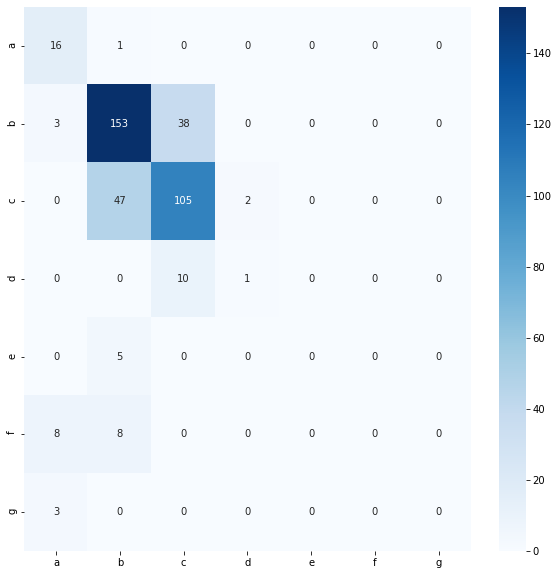

In [18]:
import seaborn as sns
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(10,10))         #

cm = confusion_matrix(y_test_true, predicted)
sns.heatmap(cm, annot=True, ax=ax, fmt='d', xticklabels=products, yticklabels=products, cmap='Blues')

#  RMSE ile Deep Neural Networks için Keras Regression

In [19]:
import pandas as pd
from scipy.stats import zscore
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [20]:
df = pd.read_csv('https://data.heatonresearch.com/data/t81-558/jh-simple-dataset.csv', 
                na_values =[ 'NA', '?'])
df.head()

,id,job,area,income,aspect,subscriptions,dist_healthy,save_rate,dist_unhealthy,age,pop_dense,retail_dense,crime,product
0,1,vv,c,50876.0,13.100000,1,9.017895,35,11.738935,49,0.885827,0.492126,0.071100,b
1,2,kd,c,60369.0,18.625000,2,7.766643,59,6.805396,51,0.874016,0.342520,0.400809,c
2,3,pe,c,55126.0,34.766667,1,3.632069,6,13.671772,44,0.944882,0.724409,0.207723,b
3,4,11,c,51690.0,15.808333,1,5.372942,16,4.333286,50,0.889764,0.444882,0.361216,b
4,5,kl,d,28347.0,40.941667,3,3.822477,20,5.967121,38,0.744094,0.661417,0.068033,a


In [21]:
df = pd.concat([df, pd.get_dummies(df['job'], prefix='job')], axis=1)
df.drop('job', axis=1, inplace=True)

df = pd.concat([df, pd.get_dummies(df['area'], prefix='area')], axis=1)
df.drop('area', axis=1, inplace=True)

df = pd.concat([df, pd.get_dummies(df['product'], prefix='product')], axis=1)
df.drop('product', axis=1, inplace=True)

median = df['income'].median()
df['income'] =  df['income'].fillna(median)

df['income'] = zscore(df['income'])
df['aspect'] = zscore(df['aspect'])
df['save_rate'] = zscore(df['save_rate'])
df['subscriptions'] = zscore(df['subscriptions'])

In [22]:
x_columns = df.columns.drop('age').drop('id')
X = df[x_columns].values
y = df['age'].values

In [23]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [24]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import EarlyStopping

model = Sequential()
model.add(Dense(25, input_dim=X.shape[1], activation='relu'))
model.add(Dense(10, activation='relu'))
model.add(Dense(1, activation='linear'))

model.compile(loss='mean_squared_error', optimizer='adam')

monitor = EarlyStopping(monitor='val_loss', min_delta=1e-3, patience=5, verbose=1,
                       mode='auto', restore_best_weights=True)

model.fit(X_train, y_train, validation_data=(X_test, y_test), callbacks=[monitor], verbose=2,
         epochs=1000)

Epoch 1/1000
50/50 - 1s - loss: 1628.7908 - val_loss: 1227.6224
Epoch 2/1000
50/50 - 0s - loss: 655.7853 - val_loss: 254.3727
Epoch 3/1000
50/50 - 1s - loss: 244.9064 - val_loss: 208.1988
Epoch 4/1000
50/50 - 1s - loss: 204.4019 - val_loss: 175.0340
Epoch 5/1000
50/50 - 1s - loss: 168.9284 - val_loss: 144.7542
Epoch 6/1000
50/50 - 1s - loss: 134.5124 - val_loss: 114.5825
Epoch 7/1000
50/50 - 1s - loss: 101.9096 - val_loss: 88.6665
Epoch 8/1000
50/50 - 1s - loss: 77.6187 - val_loss: 70.6761
Epoch 9/1000
50/50 - 1s - loss: 60.7524 - val_loss: 57.7123
Epoch 10/1000
50/50 - 0s - loss: 49.2022 - val_loss: 48.8219
Epoch 11/1000
50/50 - 0s - loss: 40.8983 - val_loss: 41.9268
Epoch 12/1000
50/50 - 1s - loss: 34.4086 - val_loss: 36.5575
Epoch 13/1000
50/50 - 0s - loss: 30.0347 - val_loss: 31.9032
Epoch 14/1000
50/50 - 0s - loss: 25.8312 - val_loss: 28.3280
Epoch 15/1000
50/50 - 0s - loss: 22.8961 - val_loss: 24.8883
Epoch 16/1000
50/50 - 1s - loss: 20.6452 - val_loss: 22.2917
Epoch 17/1000
50/5

<b>Mean Square Error (MSE)</b>

Ortalama Kare Hatası, tahmin ve beklenen değerler arasındaki farkların karelerinin toplamının eleman sayısına bölümüdür. Bir model için MSE'nin düşük olması iyi kabul edilir. 

<img src='mse.jpg' height=400 width=400/>
Kaynak: https://www.i2tutorials.com/what-are-the-different-metrics-that-will-be-used-in-linear-regression-to-check-the-accuracy-of-the-model/

In [25]:
from sklearn.metrics import mean_squared_error

In [27]:
predicted = model.predict(X_test)

mean_squared_error(y_test, predicted)

0.6495661377993747

<b>Root Mean Square Error (RMSE)</b>

RMSE, MSE'nin kareköküdür. Bir model için RMSE'nin düşük olması iyi kabul edilir. 

<img src='rmse.png' height=400 width=400/>
Kaynak: https://www.i2tutorials.com/what-are-the-different-metrics-that-will-be-used-in-linear-regression-to-check-the-accuracy-of-the-model/

In [30]:
import math

math.sqrt(mean_squared_error(y_test, predicted))

0.7312260328228506

# Lift Chart


Bir lift chart oluşturulurken aşağıdaki adımlar takip edilir.

<ol>
<li>Veri beklenen çıktıya göre sıralanır ve  bir renkli çizgi ile grafiğe aktarılır.</li>
<li>X eksenindeki aynı veri noktaları için tahmin edilen değerler farklı renkli bir çizgi ile grafiğe aktarılır.</li>
</ol>

Beklenen ve tahmin edilen değerlerer ait grafikler birbirine yakın olmalıdır. 

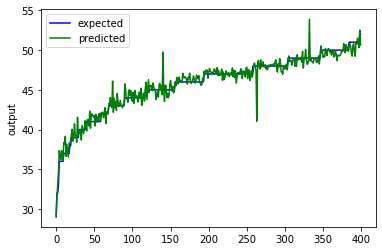

In [29]:
graph_frame = pd.DataFrame({'predicted': predicted.flatten(), 'y_test':y_test})
graph_frame.sort_values(by=['y_test'], inplace=True)

plt.plot(graph_frame['y_test'].tolist(), label='expected', color = 'blue')
plt.plot(graph_frame['predicted'].tolist(), label='predicted', color='green')
plt.ylabel('output')
plt.legend()